In [1]:
import numpy as np 
import os
import pandas as pd
import matplotlib.pyplot as plt

Data Pre - Processing

In [3]:
df=pd.read_csv('Breast Cancer Dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
def diagnosis_value(diagnosis):
        if diagnosis=='M':
            return 1
        else:
            return 0
df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

In [6]:
df.shape

(569, 31)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0],test_size=0.2, random_state=2)

In [8]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.1241,0.22640,0.1326,0.10480,0.2250,0.08321
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,...,11.68,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083
198,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.06772,0.1767,0.05529,...,23.36,32.06,166.40,1688.0,0.1322,0.56010,0.3865,0.17080,0.3193,0.09221
203,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,...,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.4646,0.20130,0.4432,0.10860
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.1909,0.26980,0.4023,0.14240,0.2964,0.09606


In [9]:
X_train.shape

(455, 30)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

In [12]:
X_train.shape


(455, 30)

In [13]:
y_train.shape

(455,)

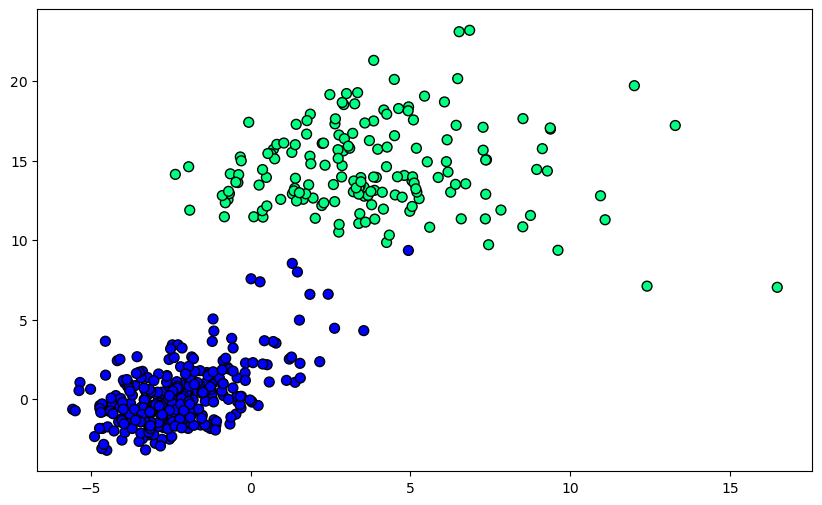

In [14]:

from sklearn.decomposition import PCA
# Assuming X_train and y_train are already defined
# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Increase separation by adding a constant value to one class
X_train_pca[y_train == 1, 1] += 15 # Shifts the second component of class 1


plt.figure(figsize=(10, 6))

# Plot the scatter plot with increased separation
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c= y_train, cmap='winter', edgecolor='k', s=50)
plt.show()

Applying Inbuilt Muliple Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression()

In [18]:
reg.fit(X_train,y_train) # fit is used to train the model on the given data

LinearRegression()

In [19]:
y_pred = reg.predict(X_test) # predicts the value of Y

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y_test,y_pred) # check the accuracy of the predicted value with the actual

0.713106702018627

In [22]:
reg.coef_

array([-9.23808743e-01,  2.13901651e-02,  3.22592849e-01,  3.78237351e-01,
        9.77705752e-03, -3.21472098e-01,  1.85896893e-01,  1.20891931e-01,
        1.81975994e-02,  2.26083578e-02,  1.34092676e-03,  7.68902631e-03,
       -3.03413113e-02,  2.22152317e-02,  3.15765259e-02,  8.28924652e-03,
       -1.22649057e-01,  8.32898774e-02,  3.21241588e-02,  3.24956011e-03,
        1.36903739e+00,  2.99985977e-02, -4.97064337e-04, -9.19680625e-01,
        3.43045260e-02,  1.13653744e-01,  6.69135738e-02, -4.94035756e-02,
        8.97345335e-03,  1.68483581e-02])

In [23]:
m= -(reg.coef_[0]/reg.coef_[1])
b= -(reg.intercept_/reg.coef_[1])

In [24]:
x_input_lr= np.linspace(-20,30,100)
y_input_lr= m*x_input_lr + b

(-10.0, 15.0)

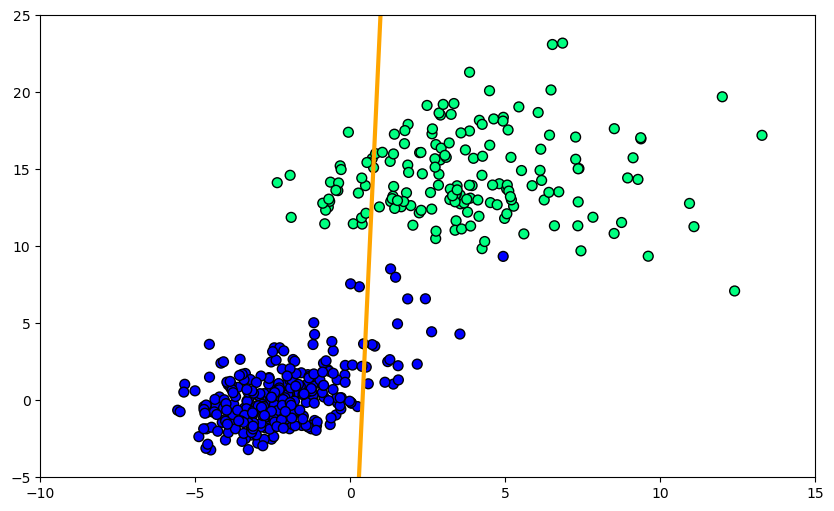

In [25]:
# we plot the graph for sigmoid fucntion 
plt.figure(figsize=(10, 6))
plt.plot(x_input_lr, y_input_lr, color='orange', linewidth=3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter',edgecolor='k', s=50)
plt.ylim(-5, 25)
plt.xlim(-10,15)

Applying a Self Built Class

In [27]:
class MultipleLR:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1) 
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0] 
        self.coef_ = betas[1:]
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_ # y = mx + b
        return y_pred

In [28]:
lr = MultipleLR()

In [29]:
lr.fit(X_train,y_train)

In [30]:
X_train.shape

(455, 30)

In [31]:
np.insert(X_train,0,1,axis=1).shape

(455, 31)

In [32]:
y_pred = lr.predict(X_test)

In [33]:
r2_score(y_test,y_pred)

0.7131067020186344

In [34]:
lr.coef_

array([-9.23808743e-01,  2.13901651e-02,  3.22592849e-01,  3.78237351e-01,
        9.77705752e-03, -3.21472098e-01,  1.85896893e-01,  1.20891931e-01,
        1.81975994e-02,  2.26083578e-02,  1.34092676e-03,  7.68902631e-03,
       -3.03413113e-02,  2.22152317e-02,  3.15765259e-02,  8.28924652e-03,
       -1.22649057e-01,  8.32898774e-02,  3.21241588e-02,  3.24956011e-03,
        1.36903739e+00,  2.99985977e-02, -4.97064338e-04, -9.19680625e-01,
        3.43045260e-02,  1.13653744e-01,  6.69135738e-02, -4.94035756e-02,
        8.97345335e-03,  1.68483581e-02])

In [35]:
lr.intercept_

0.36703296703296806

In [36]:
m= -(lr.coef_[0]/lr.coef_[1])
b= -(lr.intercept_/lr.coef_[1])

In [37]:
x_input_mlr= np.linspace(-20,30,100)
y_input_mlr= m*x_input_mlr + b

(-10.0, 15.0)

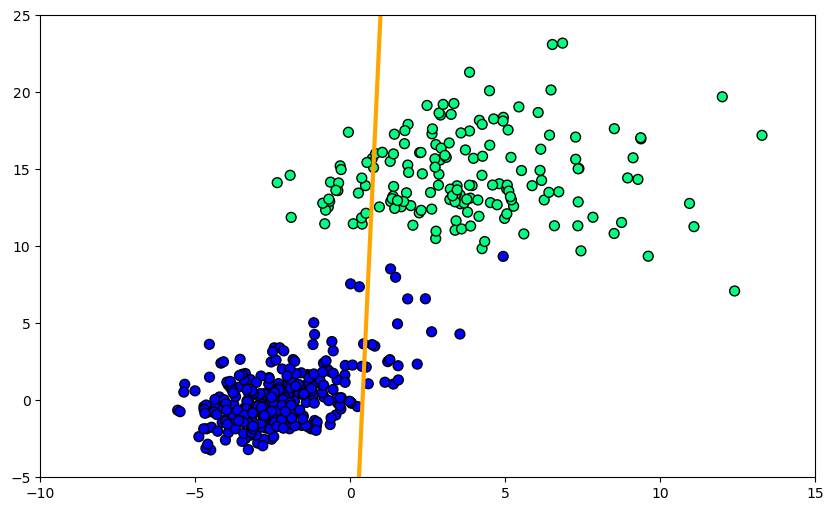

In [38]:
# we plot the graph for sigmoid fucntion 
plt.figure(figsize=(10, 6))
plt.plot(x_input_mlr, y_input_mlr, color='orange', linewidth=3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter',edgecolor='k', s=50)
plt.ylim(-5, 25)
plt.xlim(-10,15)

Applying Gradient Descent to Optimise

In [40]:
class GDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1]) 
        
        for i in range(self.epochs):
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [41]:
gd = GDRegressor(0.01,1000)

In [42]:
gd.fit(X_train,y_train)

0.36703296641526256 [ 0.1102044   0.03176984  0.06723117 -0.06024835  0.01367194 -0.19047993
 -0.01011362  0.06635066  0.01079367  0.00688316  0.09210711  0.01752897
  0.01065313 -0.07663157  0.04146048 -0.04050171 -0.0507209   0.03708894
  0.01924664  0.00487209  0.12534919  0.02629215  0.07233754 -0.08585431
  0.0308444   0.06736174  0.10270591  0.08716424  0.0331165   0.0386686 ]


In [43]:
y_pred = gd.predict(X_test)

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7554621878145631

In [45]:
gd.coef_

array([ 0.1102044 ,  0.03176984,  0.06723117, -0.06024835,  0.01367194,
       -0.19047993, -0.01011362,  0.06635066,  0.01079367,  0.00688316,
        0.09210711,  0.01752897,  0.01065313, -0.07663157,  0.04146048,
       -0.04050171, -0.0507209 ,  0.03708894,  0.01924664,  0.00487209,
        0.12534919,  0.02629215,  0.07233754, -0.08585431,  0.0308444 ,
        0.06736174,  0.10270591,  0.08716424,  0.0331165 ,  0.0386686 ])

In [46]:
gd.intercept_

0.36703296641526256

In [47]:
m= -(gd.coef_[0]/gd.coef_[1])
b= -(gd.intercept_/gd.coef_[1])

In [48]:
x_input_bgd= np.linspace(-20, 30, 100)
y_input_bgd= m*x_input_bgd +b

(-10.0, 15.0)

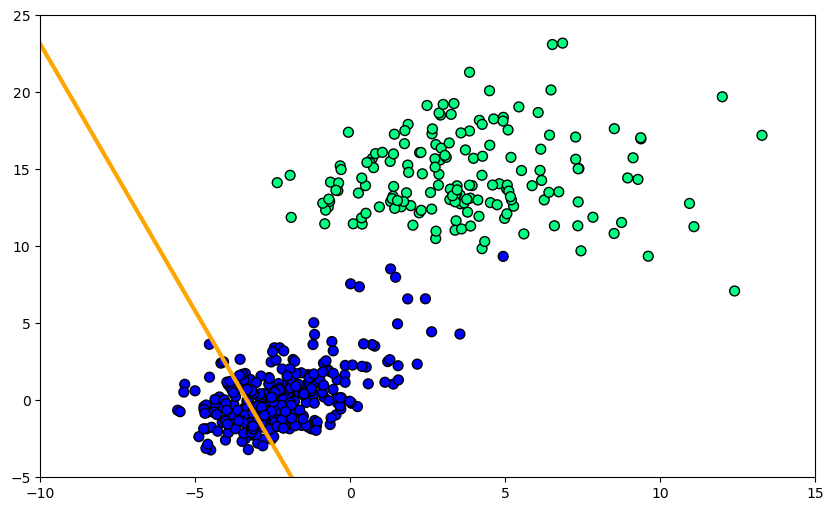

In [49]:
# we plot the graph for sigmoid fucntion 
plt.figure(figsize=(10, 6))
plt.plot(x_input_bgd, y_input_bgd, color='orange', linewidth=3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter',edgecolor='k', s=50)
plt.ylim(-5, 25)
plt.xlim(-10,15)

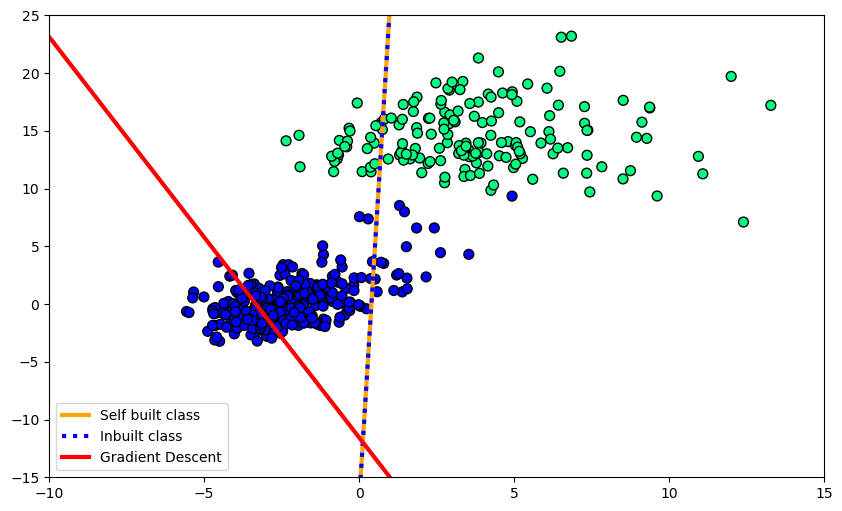

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(x_input_mlr, y_input_mlr, color='orange', linewidth=3, label = 'Self built class')
plt.plot(x_input_lr, y_input_lr, color='blue', linewidth=3, linestyle=':', label = 'Inbuilt class')
plt.plot(x_input_bgd, y_input_bgd, color='red', linewidth=3, label ='Gradient Descent')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter',edgecolor='k', s=50)
plt.ylim(-15, 25)
plt.xlim(-10,15)
plt.legend()
